# Defining multi-layer perceptrons



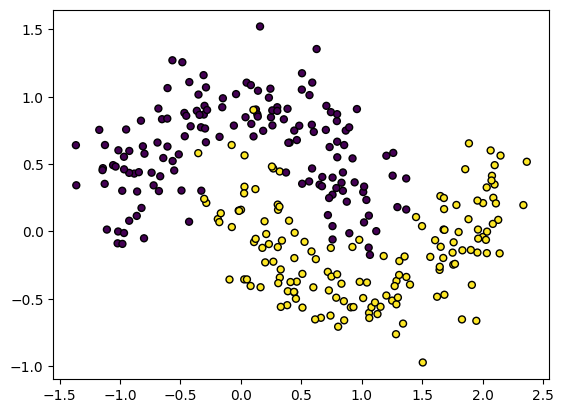

In [17]:
# Creating data non-linearly separable
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
 c=Y1, s=25, edgecolor='k')

## Using GPU for processing

In order to execute large neural networks, we need to use the GPU to speed up the training process.

We can check if the GPU is available using the following code:

In [18]:
import torch
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
  
print(device) # Print what device is being used cpu or cuda (GPU)

cpu


## nn.Sequential

Create a neural network with a sequence of layers

In [19]:
## Example of a neural network with 2 hidden layers and a activation function ReLU (Rectified Linear Unit)
from torch import nn # neural networks

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),    # hidden
                    nn.ReLU(),                                                      # non-linear activation function
                    nn.Linear(in_features=hidden_size, out_features=output_size))   # output
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


### Torch Summary
`torchsummary` is a package that summarizes `PyTorch` models.
It provides information about the number of parameters and the size of the output of each layer.

Ref: https://github.com/sksq96/pytorch-summary

In [20]:
from torchsummary import summary
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


### Forward

In [21]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])



## nn.Module 
Base class for all neural network modules. Is the most organized way to create a neural network in PyTorch.
You can create a class that inherits from nn.Module and define the layers in the constructor and the forward method.

Obrigatory methods:
- __init__(self): Constructor
- forward(self, X): Forward pass

In [22]:
class MyNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MyNet, self).__init__()
    
    # Defining the layers
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
  def forward(self, X):  
    # Forward pass
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)
    return output

In [23]:
# Creating the network object
input_size = 2
hidden_size = 8
output_size = 1

net = MyNet(input_size,hidden_size, output_size)
print(net)

MyNet(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


### Forward

In [24]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
